# Recap! 4. Getting started with neural networks

In [1]:
import numpy as np

import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

# we need more than the default 75 below
np.set_printoptions(linewidth=150)

# matplotlib adjustment
plt_fontsize = matplotlib.rcParams["font.size"]

---

## The 'Neuron'/Unit: fundamental operation in NNs

$$
\bbox[5px,border:2px solid red]{
    \sigma(Wx + b) = a
}
$$

$W$: weights  
$x$: input  
$b$: bias  
$\sigma$: activation  
$a$: output

$$
 \bbox[5px,border:2px solid red]{
     \text{affine transformation} \rightarrow \text{nonlinearity}
} 
$$

### Why nonlinearities??

The hypothesis space of a layer without activation is the **set of all possible affine transformations**.

A stack of unactivated layers has nothing more than an affine hypothesis space.

**No matter how many layers you add, the overall transformation will remain affine.**

An affine hypothesis space is **representationally limited**.

Nonlinearities give networks more **expressive powers** (they can represent more complex functions).

---

## Activation functions

- Sigmoid
- Tanh
- Rectified Linear Unit (ReLU)

### Sigmoid

The math (for reference!):

$$
\bbox[5px,border:2px solid red]
{
\text{sigmoid}(x) = \frac{1}{1 + e^{-x}}
}
$$

What it does:
- squishes everything between zero and one.

Think: smooth & differentiable **step function** (on/off switch).

In [2]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def plot_sigmoid():
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, sigmoid(x), 'b', label='sigmoid')
    plt.xlim([-5,5])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')    
    plt.legend()
    plt.grid()
    plt.show()

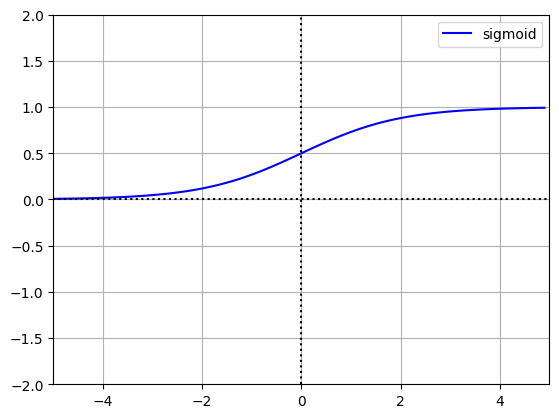

In [3]:
plot_sigmoid()

### Tanh

The math (for reference!):

$$
\bbox[5px,border:2px solid red]
{
\tanh(x)= \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} +1}
}
$$

What it does: 
- squishes everything between -1 and 1.

Think: *step function* (on/off switch) between -1 and 1.

In [4]:
def tanh(z):
    e = np.exp(2*z)
    return (e - 1)/(e + 1)

def plot_tanh():
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, tanh(x), 'b', label='tanh')
    plt.xlim([-5,5])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')      
    plt.legend()
    plt.grid()
    plt.show()

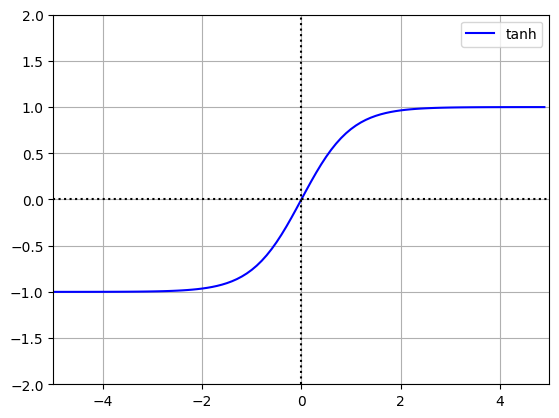

In [5]:
plot_tanh()

### ReLU

The math (for reference!):

$$
\bbox[5px,border:2px solid red]
{
 \text{relu}(x) = \max(0, x)
}
$$

What it does:
- projects the negative part on zero, leaves the positive part unchanged.

Think: a **radically simplified** *step-ish function* (on/off switch)?

In [6]:
def relu(z):
    return np.maximum(z, 0)

def plot_relu():
    import matplotlib.pyplot as plt
    x = np.arange(-2, 2, 0.1)
    plt.plot(x, relu(x), 'b', label='relu')
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.axhline(y=0, color='k', linestyle=':')
    plt.axvline(x=0, color='k', linestyle=':')
    plt.legend()
    plt.grid()
    plt.show()

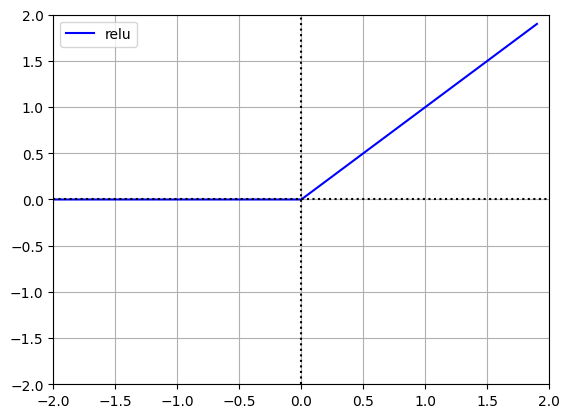

In [7]:
plot_relu()

### More activation functions

As often happens in deep learning, there are a lot of variations, with the field constantly evolving ([all activations available in TF](https://www.tensorflow.org/api_docs/python/tf/keras/activations)). No need to to know all these by heart!

<!-- <img src="images/deep/activation-functions-stanford-cs231n.png" style="width: auto; height: 700px;"> -->
<img style="width: auto; height: 700px;" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/deep/activation-functions-stanford-cs231n.png?raw=true">

<small>[Stanford CS 231N, lecture 6 slides](http://cs231n.stanford.edu/2017/syllabus.html)</small>

### Softmax

The math, (for reference!):

$$
\bbox[5px,border:2px solid red]
{
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_i e^{x_i}}
}
$$

What it does:
- make all numbers positive (through $e^x$);
- make big numbers *very* big (through $e^x$) → they will take all the probability mass;
- normalize → **all numbers between 0 and 1 and all sum to 1**  (divide by the total $ \sum_i e^{x_i}$).
  
Think: turn numbers into a probability distribution.

In [8]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def plot_softmax(x):
    plt.bar([str(x) for x in range(x.shape[0])], softmax(x))
    plt.ylim([0,1])
    plt.title("Softmax")
    plt.show()

##### Note

Because $e^x$ will make big numbers *very big*, the largest one will **overtake all the rest**.

**The larger the numbers, the closer _softmax_ resembles a normal max**.

Because there will always be a tiny bit of probability mass left on the rest, it is a **soft**max.

Also: smooth & differentiable. (✯◡✯)

In [24]:
nums = tf.random.uniform(shape=(10,))                   # ten random numbers

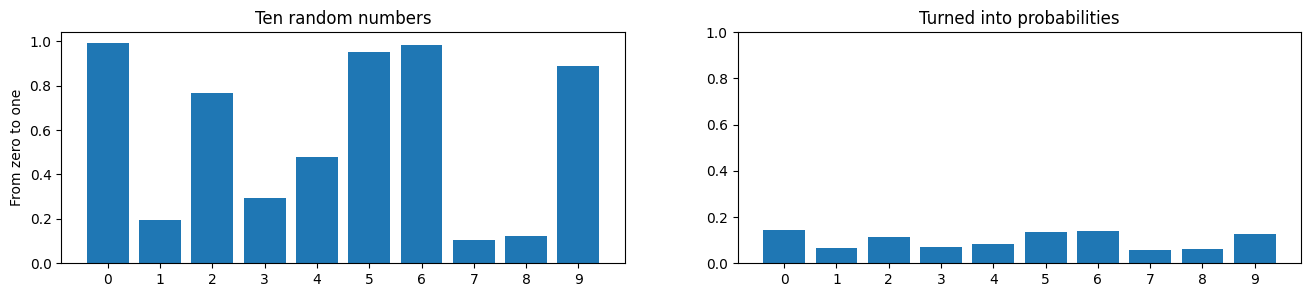

In [10]:
probs = tf.nn.softmax(nums)                             # turned into probabilities

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))
ax1.bar([str(x) for x in range(nums.shape[0])], nums)   # our ten numbers
ax1.set_title("Ten random numbers")
ax1.set_ylabel("From zero to one")
ax2.bar([str(x) for x in range(probs.shape[0])], probs) # the probabilities
ax2.set_title("Turned into probabilities")
ax2.set_ylim([0,1])
plt.show()

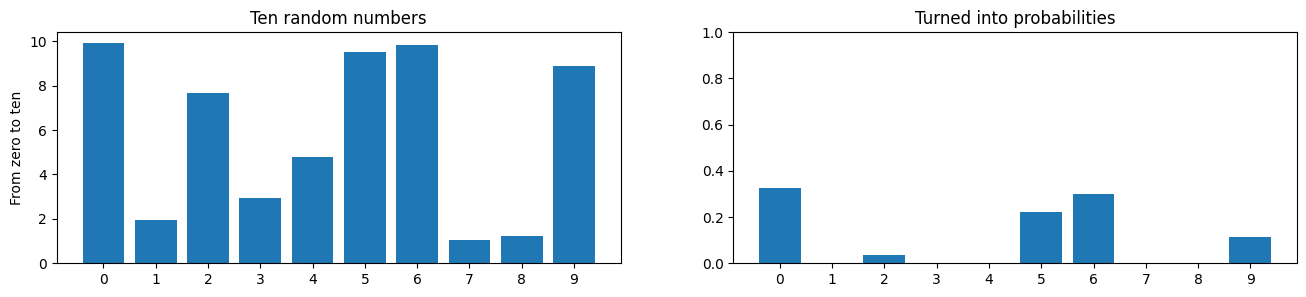

In [11]:
nums_ten = nums * 10                                          # the same ten random numbers * 10
probs = tf.nn.softmax(nums_ten)                               # turned into probabilities

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))
ax1.bar([str(x) for x in range(nums_ten.shape[0])], nums_ten) # our ten numbers
ax1.set_title("Ten random numbers")
ax1.set_ylabel("From zero to ten")
ax2.bar([str(x) for x in range(probs.shape[0])], probs)       # plot the probabilities
ax2.set_title("Turned into probabilities")
ax2.set_ylim([0,1])
plt.show()

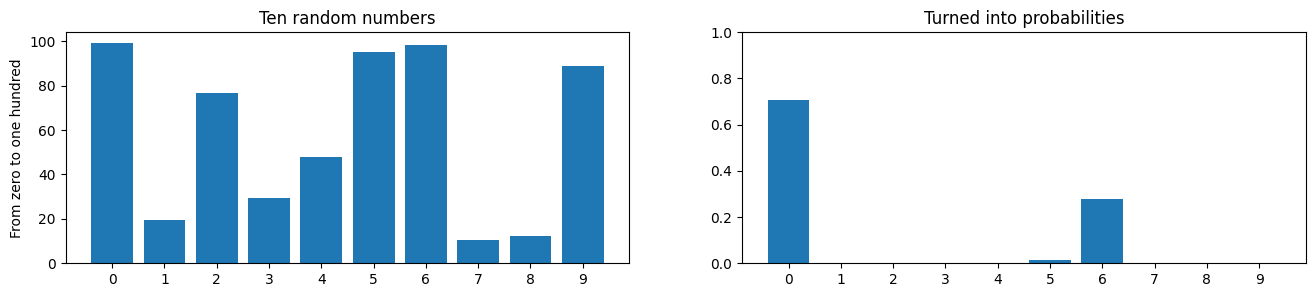

In [12]:
nums_hundred = nums * 100                                             # the same ten random numbers * 100
probs = tf.nn.softmax(nums_hundred)                                   # turned into probabilities

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))
ax1.bar([str(x) for x in range(nums_hundred.shape[0])], nums_hundred) # our ten numbers
ax1.set_title("Ten random numbers")
ax1.set_ylabel("From zero to one hundred")
ax2.bar([str(x) for x in range(probs.shape[0])], probs)               # plot the probabilities
ax2.set_title("Turned into probabilities")
ax2.set_ylim([0,1])
plt.show()

---

## Dense layers

$$
\bbox[5px,border:2px solid red]{
    \sigma(Wx + b) = a
}
$$

### Example with two inputs, one neuron

$$
\newcommand\mycolv[1]{\begin{bmatrix}#1\end{bmatrix}}
   \sigma\left( \mycolv{w_{11} & w_{12}}\mycolv{x_{1}\\ x_{2}}  + b_1 \right) = a_1
$$


<!-- <img style="" src="images/nn/nn.2.svg"> -->

<img style="float:left" src="https://raw.githubusercontent.com/jchwenger/AI/d942b064df6d0e929cbd027bc6a6939f9e8fc763/3-getting-started/images/nn/nn.2.svg">

### Example with two inputs, two neurons

We can do these two operations in one fell swoop using matrix multiplication.


\begin{eqnarray}
\sigma \left(
\begin{bmatrix} w_{11} & w_{12} \\  w_{21} & w_{22} \end{bmatrix} 
\begin{bmatrix} x_1  \\ x_2  \end{bmatrix}
+
\begin{bmatrix} b_1  \\ b_2 \end{bmatrix}
\right)
= \begin{bmatrix} a_1  \\ a_2 \end{bmatrix} 
\end{eqnarray}

<!-- <img style="" src="images/nn/nn.3.svg"> -->

<img style="float:left" src="https://raw.githubusercontent.com/jchwenger/AI/d942b064df6d0e929cbd027bc6a6939f9e8fc763/3-getting-started/images/nn/nn.3.svg">

### Example with two inputs, n neurons

\begin{eqnarray}
\sigma \left(
\begin{bmatrix} w_{11} & w_{12} \\ \vdots & \vdots  \\ w_{n2} & w_{n2} \end{bmatrix}
\begin{bmatrix} x_1  \\ x_2  \end{bmatrix}
+
\begin{bmatrix} b_1 \\ \vdots \\ b_n \end{bmatrix} 
\right) = 
\begin{bmatrix} a_1 \\ \vdots  a_n \end{bmatrix} 
\end{eqnarray}


Example with 12 neurons:

<!-- <img style="" src="images/nn/nn.4.svg"> -->

<img style="float:left" src="https://raw.githubusercontent.com/jchwenger/AI/d942b064df6d0e929cbd027bc6a6939f9e8fc763/3-getting-started/images/nn/nn.4.svg">

### NumPy example

In [26]:
# a three unit layer
len_input = 2
n_units = 8                                        # example:
x = tf.random.normal(shape=(len_input,1))          # (2,1)
w = tf.random.normal(shape=(n_units,len_input))    # (16,2)   | (16,2)·(2,1) → (16,1)
b = tf.random.normal(shape=(n_units,1))            # (16,1)

In [27]:
print(x.shape)
print(x.numpy())

(2, 1)
[[ 1.7101114]
 [-0.2813257]]


In [28]:
print(w.shape)
print(w.numpy())

(8, 2)
[[-0.8353326   0.54043335]
 [ 0.6088208   0.20730798]
 [ 0.03172677 -0.68164515]
 [ 2.1820533  -0.33771464]
 [-0.46590576  1.8025855 ]
 [-0.23358458 -0.38758412]
 [ 0.80044967 -0.7352893 ]
 [-2.1235993  -1.1913586 ]]


In [29]:
print(b.shape)
print(b.numpy())

(8, 1)
[[ 0.16505377]
 [ 2.1768317 ]
 [-0.89663607]
 [-0.741493  ]
 [ 1.6359739 ]
 [-0.31671113]
 [-1.0958076 ]
 [ 1.464819  ]]


Now our affine transformation followed by `relu`.

In [30]:
y = w @ x         # now our input x has been *projected* into an 8-dimensional space
print(y.shape)
print(y.numpy())

(8, 1)
[[-1.5805495 ]
 [ 0.98283035]
 [ 0.24602062]
 [ 3.8265622 ]
 [-1.3038644 ]
 [-0.2904183 ]
 [ 1.5757139 ]
 [-3.2964315 ]]


In [31]:
y += b # adding the bias elementwise
print(y.shape)
print(y.numpy())

(8, 1)
[[-1.4154958 ]
 [ 3.159662  ]
 [-0.65061545]
 [ 3.0850692 ]
 [ 0.33210957]
 [-0.60712945]
 [ 0.47990632]
 [-1.8316126 ]]


In [32]:
a = tf.nn.relu(y) # applying ReLU elementwise
print(a.shape)
print(a.numpy())

(8, 1)
[[0.        ]
 [3.159662  ]
 [0.        ]
 [3.0850692 ]
 [0.33210957]
 [0.        ]
 [0.47990632]
 [0.        ]]


---

## The Loss

### Statement

The math (for reference): 

$$ 
\bbox[5px,border:2px solid red]
{
\DeclareMathOperator*{\argmax}{argmax} % thin space, limits underneath in displays
J(\theta) = \frac{1}{m}\sum_{i=1}^m Loss(f(x^i;\theta),y^i)
}
$$

$$J = loss, f = model, \theta = parameters, x = sample, y = label$$


How well our model is doing. 

Discrepancy between our predictions and our targets.

The loss is defined **over the entire dataset** (how well we do **on average**).

### Categorical cross entropy

<!-- <img style="height:250px" src="images/ml/cross-entropy.png"> -->
<img src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/ml/cross-entropy.png?raw=true">

<small>[What is cross-entropy, Stack Overflow](https://stackoverflow.com/a/41990932)</small>

For **all** categories except the right one, the terms of this sum will be zero.

Since `true_class` is 1, we are left only with: 

$$
\bbox[5px,border:2px solid red]
{
- p(\text{true class})\ log{(\text{prediction})} \to - log{(\text{prediction})} 
}
$$

In [20]:
def plot_minus_log(figsize=(10,8)):
    points = tf.linspace(.001, 1, 100) # a hundred points between .001 and 1
    matplotlib.rcParams.update({'font.size': plt_fontsize * 1.5})
    f = plt.figure(figsize=figsize)
    plt.xlim([-.1,1.1])
    plt.plot(points, - tf.math.log(points), label="- log(x)")
    plt.text(0.05, 6, "← we are very WRONG: prediction")
    plt.text(0.05, 5.5, "is almost 0 but the truth is 1...")
    plt.text(0.05, 5, "BIG loss!")
    plt.text(.52, 1.5, "we are super RIGHT: prediction")
    plt.text(.52, 1, "is almost 1 and the truth is 1...")
    plt.text(.8, .5, "SMALL loss ↓")
    plt.xlabel("Prediction: from 0 to 1")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    matplotlib.rcParams.update({'font.size': plt_fontsize})

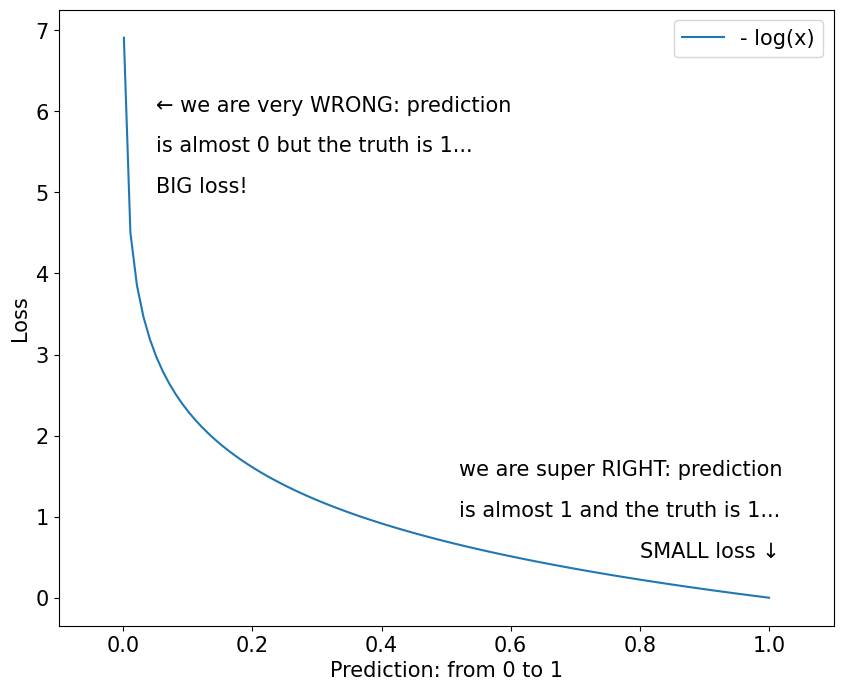

In [21]:
plot_minus_log()

### Binary cross-entropy

The math (for reference):

\begin{align*}
\bbox[5px,border:2px solid red]
{
J_{sample} = \color{purple}{- y \log y_{pred}} \color{navy}{- (1 - y) \log (1 - y_{pred})}
}
\end{align*}

- $y$: our **label**, either 0 or 1.  
- $y_{pred}$: our **predictions**: a probability between 0 and 1!  
- smooth & differentiable for SGD. (◕‿◕)

Notice the $y$ and $(1 - y)$?

This means that if $y$ is 0, the left term goes away, and vice-versa if $y$ is 1.

In [22]:
def plot_binary_crossentropy(figsize=(10,8)):
    preds = np.linspace(0.01, .99, 100)
    matplotlib.rcParams.update({'font.size': plt_fontsize * 1.5}) # bigger font
    f = plt.figure(figsize=figsize)                               # control figure size
    plt.plot(preds, -np.log(preds), label="If truth is 1: -log(x)")
    plt.plot(preds, -np.log(1 - preds), label="If truth is 0: -log(1 - x)")
    plt.text(0.03, 4, "← truth: 1") # -log(x)
    plt.text(0.065, 3.8, "pred: 0")
    plt.text(0.065, 3.55, "BAD!")
    plt.text(0.055, 0.7, "truth: 0")
    plt.text(0.055, 0.5, "pred: 0")
    plt.text(0.02, 0.3, "↓ GOOD!")
    plt.text(0.82, 4, "truth: 0 →") # -log(1-x)
    plt.text(0.82, 3.8, "pred: 1")
    plt.text(0.82, 3.55, "BAD!")
    plt.text(0.88, 0.7, "truth: 1")
    plt.text(0.88, 0.5, "pred: 1")
    plt.text(0.85, 0.3, "↓ GOOD!")
    plt.title("Logistic regression loss")
    plt.xlabel("Predictions")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()
    matplotlib.rcParams.update({'font.size': plt_fontsize})

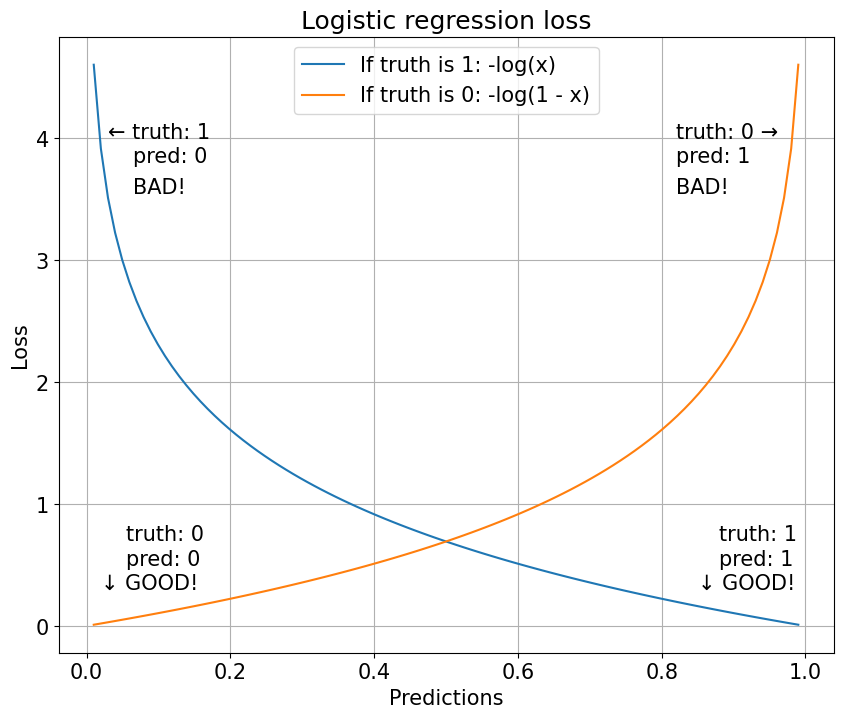

In [23]:
plot_binary_crossentropy()

### Mean squared error  (MSE)

A common regression **loss**:

$$
\bbox[5px,border:2px solid red]
{
\text{MSE} = \frac{1}{N} \sum (y_{pred} - y)^2
}
$$

$y$: target  
$y_{pred}$: network output  
$N$: mini-batch size

- continuous and differentiable;
- cost grows exponentially: outliers are penalised.

### Mean absolute error (MAE)

Our **metric** will be:

$$
\bbox[5px,border:2px solid red]
{
\text{MAE} = \frac{1}{N}\sum |y_{pred} - y |
}
$$

- nondifferentiable ([Keras will still allow you to use it as a loss...](https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative));
- grows linearly: outliers are not more penalised.

In [13]:
def plot_mse_mae():
    nums = np.linspace(-1.5,1.5, 100) # one hundred numbers from -10 to 10

    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,3))

    ax1.plot(nums, nums ** 2)                     # mean squared error (from zero)
    ax1.set_title("Mean squared error (MSE)")
    ax1.set_xlabel("distance from the mean")
    ax1.set_ylabel("loss")
    ax2.plot(nums, np.abs(nums))                  # mean absolute error (from zero)
    ax2.set_title(f"Mean absolute error (MAE)")
    ax2.set_xlabel("distance from the mean")
    ax2.set_ylabel("loss")
    plt.show()

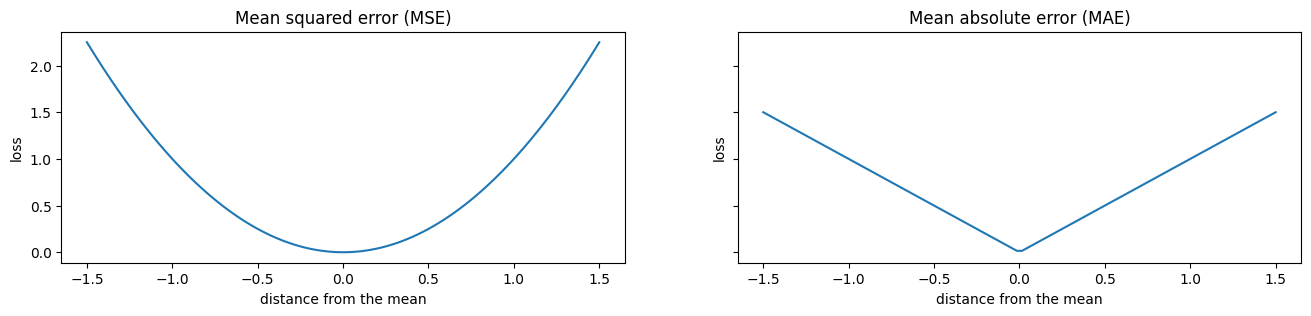

In [14]:
plot_mse_mae()

---

## Stochastic Gradient Descent

The **input space** of our loss function (our parameters) is like a **landscape** (each dimension represents a **parameter** in our model, the loss gives us the "height").

We want to find mimima = **the lowest points** in this landscape.

Too complicated to calculate as a whole: instead, we search the space step by step.

<!-- <img style="height: 350px;float:right;" src="images/ml/loss.landscape.jpeg"> -->

<img style="height: 350px;float:right;" src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/ml/loss.landscape.jpeg?raw=true">

<small style="position:absolute;bottom:0;right:0">A. Amini et al. “[Spatial Uncertainty Sampling for End-to-End Control](https://arxiv.org/abs/1805.04829)”. *NeurIPS Bayesian Deep Learning 2018*</small>

### The Gradient

Allows us to know precisely **what influence** each of our parameters has on our loss.

The **negative gradient** gives us the direction of **steepest descent**.

How to change our parameters to make our loss change the most (locally).

### Backpropagation

Allows us to calculate the gradient our loss function: the influence of each parameter on our loss.

### The Learning rate

If the **gradient** tells us 'where to go' in the loss landscape (our compass),

we need to know **by how much we move**:

that's the **learning rate** (aka **step size**).

Common values for the learning rate:

- `1e-4` (Chollet)
-  `3e-4` (many others)

##### Beware!
- Too small: too slow;
- Too big: we bounce around, danger of divergence!

Keras has sound default settings built-in!

### Optimizers

Optimizers automate the updating of our parameters. Here are the most common:

1. `Adam` (frankly, the most popular out there)
2. `RMSProp` (Chollet's fav?)
3. `SGD with momentum`(less costly, but tricky)

Recommended playground:

<!-- [!["Why Momentum Really Works", by Gabriel Oh, on Distill](images/gabriel-oh-momentum.png)](https://distill.pub/2017/momentum/) -->
<a href="https://distill.pub/2017/momentum/"><img src="https://github.com/jchwenger/AI/blob/main/3-getting-started/images/gabriel-oh-momentum.png?raw=true"></a>

Real life problem: we train networks **without such simple visualisations**.




In the above picture:
- the contour lines (altitude) are the loss we get at a particular point;
- the distance between each orange dot is determined by the step size;
- the direction of each orange line is determined by:
  - the gradient, but also,
  - the 'history of the gradient' (aka momentum: the ball on a slope analogy).
    With more momentum, you tend to move **more along the 'terrain'** (inside the 'ravine' of that example, rather than outside it).

### Batch size

Our loss ideally should be calculated **on our whole dataset**. Too expensive!

Instead, we can approximate it by computing it on a **subset** (a mini-batch), much quicker.

Also less noisy than a single sample!

Bigger batch size:  
- more precise gradient;  
- more expensive;
- try a bigger learning rate (= step size)!